# Unsupervised Analysis of Days of Week

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from analysis_packages.data import get_data
df = get_data()

<Axes: xlabel='time'>

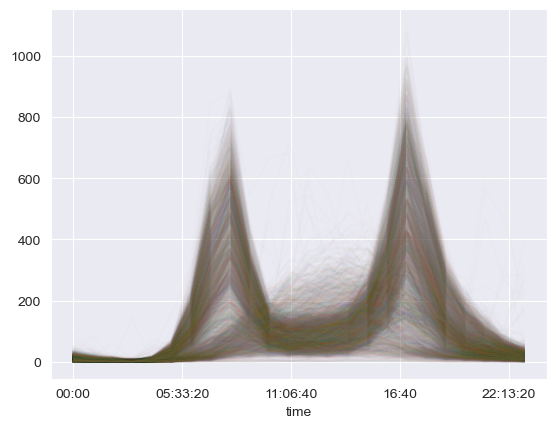

In [3]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.plot(legend=False, alpha=0.01)

## PCA

In [4]:
x = pivoted.fillna(0).T.values
x.shape

(4108, 24)

In [5]:
x2 = PCA(2, svd_solver='full').fit_transform(x)
x2.shape

(4108, 2)

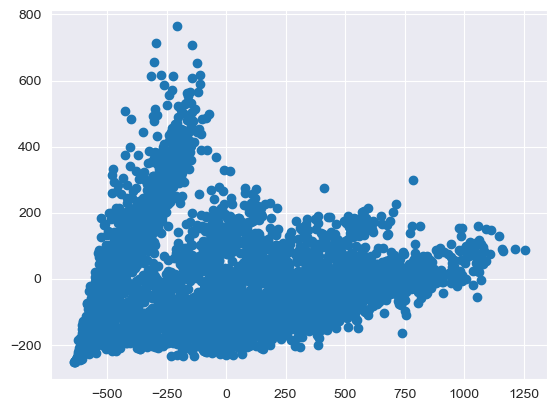

In [6]:
plt.scatter(x2[:,0], x2[:,1])

## Unsupervised clustering

In [7]:
gmm = GaussianMixture(2).fit(x)
labels = gmm.predict(x)

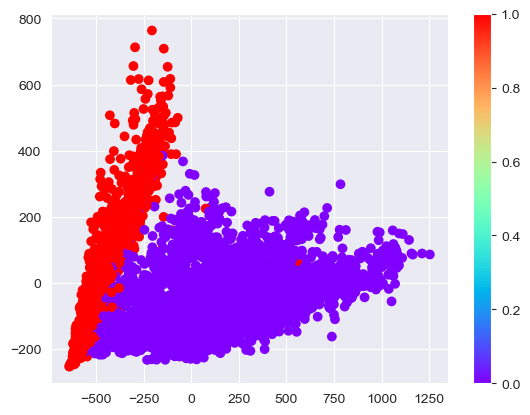

In [8]:
plt.scatter(x2[:,0], x2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'red cluster')

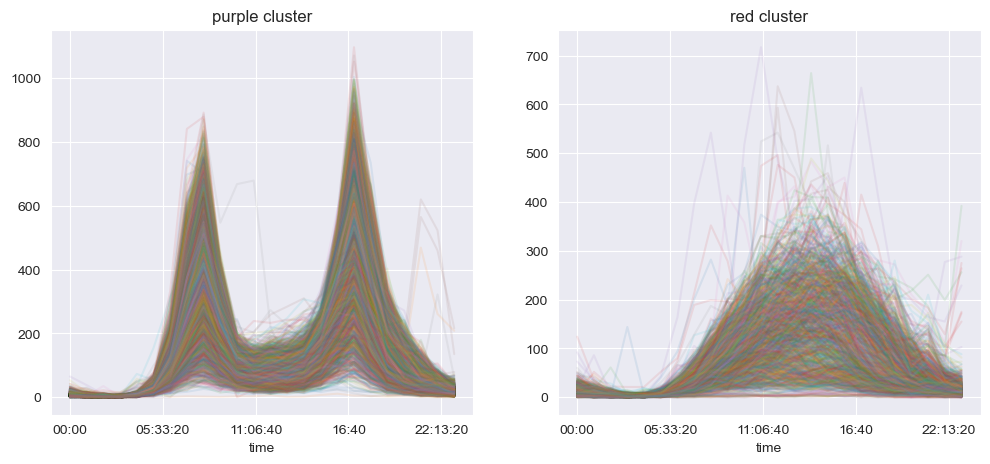

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])
ax[0].set_title('purple cluster')
ax[1].set_title('red cluster')

## Comparing with day of week

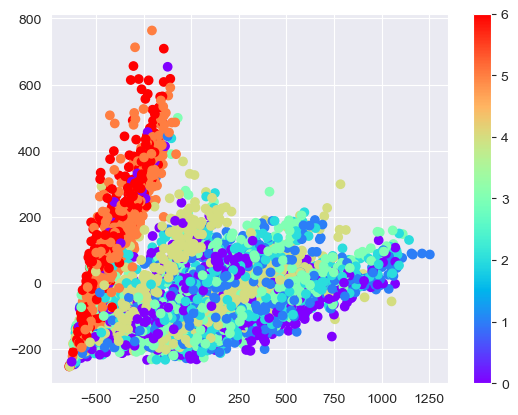

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(x2[:,0], x2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing outliers
The following points are weekdays with a holidy-like pattern

In [11]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels ==1) & (dayofweek <5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29',
               ...
               '2023-02-20', '2023-05-29', '2023-07-04', '2023-09-04',
               '2023-11-23', '2023-11-24', '2023-12-22', '2023-12-25',
               '2023-12-26', '2023-12-29'],
              dtype='datetime64[ns]', length=118, freq=None)